In [6]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


In [7]:
from pathlib import Path

IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [8]:
import numpy as np

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector


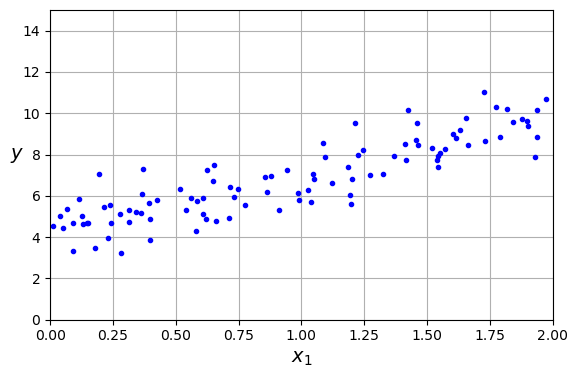

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("generated_data_plot")
plt.show()


In [10]:
from sklearn.preprocessing import add_dummy_feature

# Nous ajoutons la valeur biais = 1 à chaque instance
X_b = add_dummy_feature(X)
# Nous utilisons la fonction inv() pour inverser la matrice, et la fonction @ pour réaliser le produit matriciel
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y


In [11]:
theta_best


array([[4.21509616],
       [2.77011339]])

In [12]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict


array([[4.21509616],
       [9.75532293]])

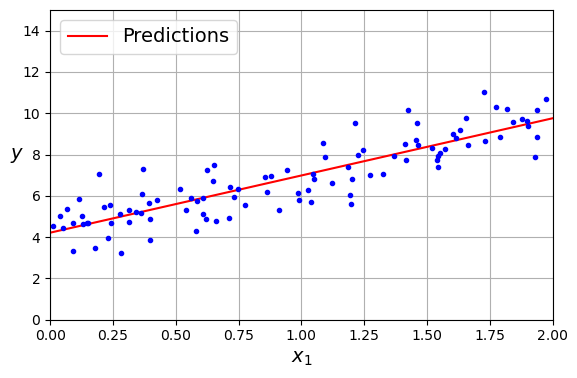

In [13]:
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
save_fig("linear_model_predictions_plot")

plt.show()


In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_


(array([4.21509616]), array([[2.77011339]]))

In [15]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2, 1)  # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients


In [16]:
theta


array([[4.21509616],
       [2.77011339]])

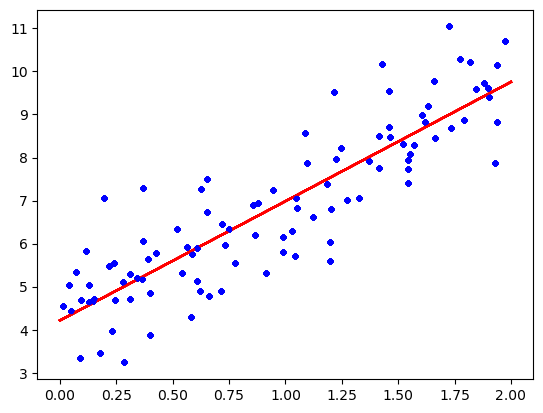

In [17]:
etas = [0.02, 0.1, 0.5]
n_iterations = 9
m = 100
theta = np.random.randn(2, 1)
for eta, i in zip(etas, range(1, 4)):
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        plt.plot(X_new, y_predict, "r-", label="Predictions")
        plt.plot(X, y, "b.")


In [18]:
theta_path_bgd = []


def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)


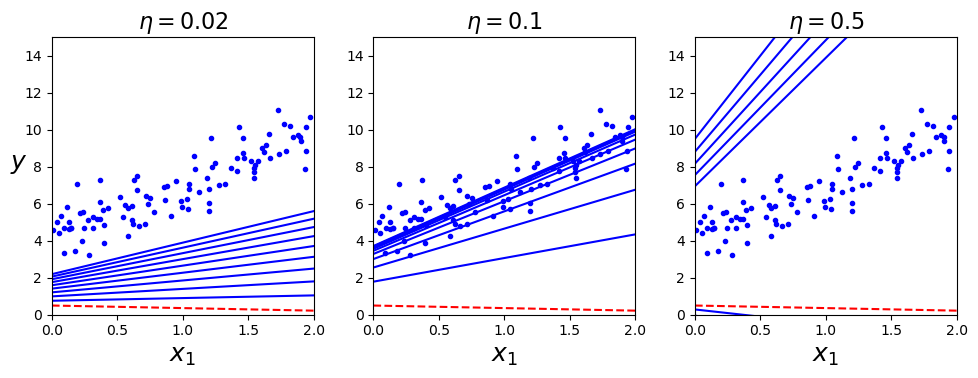

In [19]:
np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132)
plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()


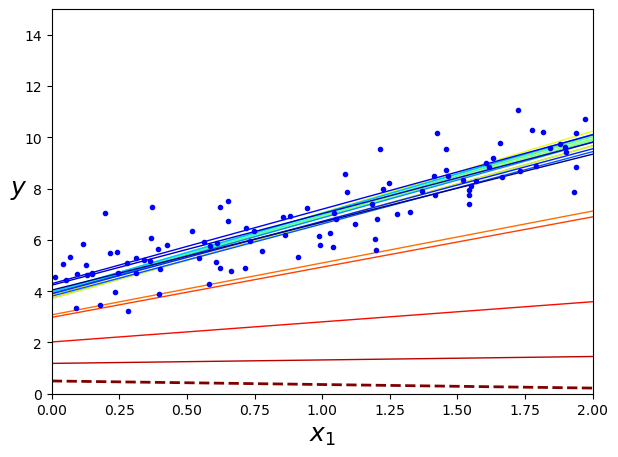

In [20]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50  # number of times the algorithm "sees" the whole dataset
t0, t1 = 5, 50  # learning schedule hyperparameters
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(1, 0, 20)]


def learning_schedule(t):
    return t0 / (t + t1)  # starting at 1/10 then decreasing towards 0


theta = np.random.randn(2, 1)  # random initialization

# loop over one epoch : epoch+=1 once the algorithm has gone through the whole dataset
for epoch in range(n_epochs):
    for i in range(m):  # looping over the dataset
        if epoch == 0 and i < 20:  # plotting the first 20 iterations in the first epoch
            y_predict = X_new_b.dot(theta)
            style = "-" if i > 0 else "--"
            width = 1 if i > 0 else 2
            plt.plot(X_new, y_predict, ls=style, lw=width, color=colors[i])
        random_index = np.random.randint(m)  # choosing a random index
        # selecting instance corresponding to random index
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)  # calculating gradient
        eta = learning_schedule(epoch * m + i)  # tweaking learning rate
        theta = theta - eta * gradients  # changing parameters
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("sgd_plot")
plt.show()


In [21]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [22]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.23868557]), array([2.82181634]))

In [23]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [24]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

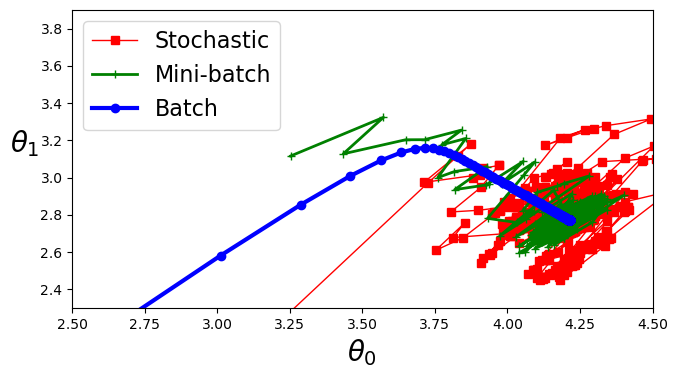

In [25]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

In [26]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

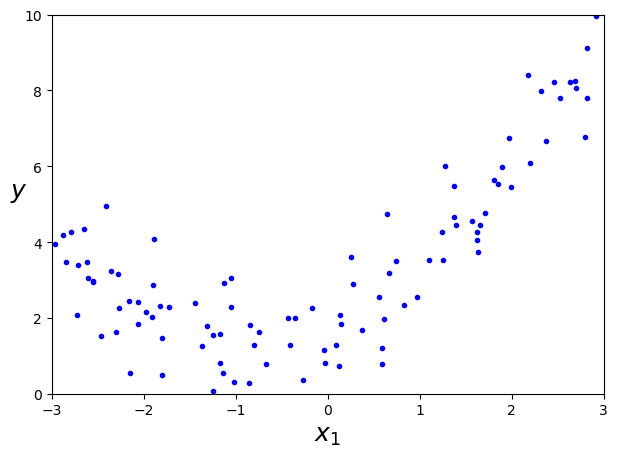

In [27]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [29]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [30]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

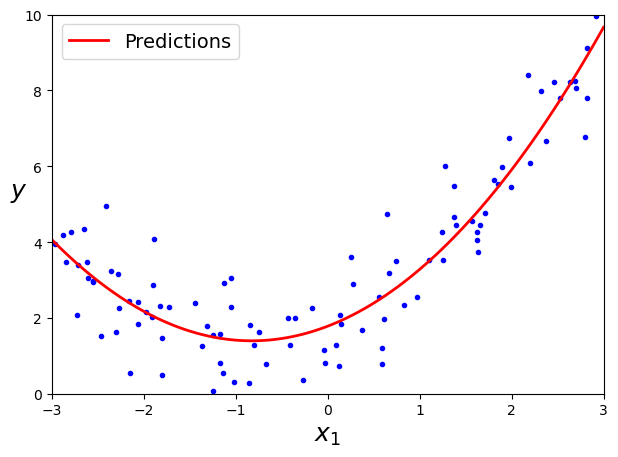

In [31]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

In [32]:
poly_features_300 = PolynomialFeatures(degree=300, include_bias=False)
X_poly_300 = poly_features_300.fit_transform(X)

In [33]:
lin_reg_300 = LinearRegression()
lin_reg_300.fit(X_poly_300, y)

LinearRegression()

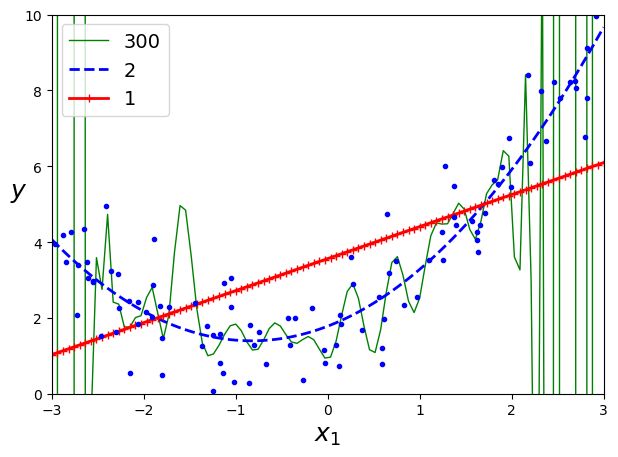

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import os

def plot_learning_curves(model, X, y, order):
	np.random.seed(42)
	if order == 1:
		out='linear_learning_curves'
	else:
		out=f'poly{order}_learning_curves'
	if not os.path.exists('images/'+out):
    # Crée le dossier si nécessaire
		os.makedirs('images/'+out)
	# Division du dataset
	X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
	train_errors, val_errors = [], []
	# A chaque iteration, le modèle est entraîné sur un dataset de plus en plus grand
	for m in range(1, len(X_train)):
		polybig_features = PolynomialFeatures(degree=order, include_bias=False)
		std_scaler = StandardScaler()
		lin_reg = LinearRegression()
		model = Pipeline([
				("poly_features", polybig_features),
				("std_scaler", std_scaler),
				("lin_reg", lin_reg),
        ])
		model.fit(X_train[:m], y_train[:m])
		y_train_predict = model.predict(X_train[:m])
		y_val_predict = model.predict(X_val)
		# Calcul de la fonction de coût
		train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
		val_errors.append(mean_squared_error(y_val, y_val_predict))
		plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
		plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
		plt.axis([0, len(X_train), 0, 4])
		plt.legend(loc='upper right')
		save_fig(f'{out}/{out}_{str(m)}')
		plt.close()
		plt.plot(X, y, 'b.')
		plt.plot(X_new, model.predict(X_new), 'r-', label=f'{out.split("_")[0]} prediction')
		plt.xlabel("$x_1$", fontsize=18)
		plt.ylabel("$y$", rotation=0, fontsize=18)
		plt.axis([-3, 3, 0, 10])
		plt.legend(loc='upper left')
		save_fig(f'{out}/{out.split("_")[0]}_predictions_{str(m)}')
		plt.close()

In [36]:
import imageio
import os

def gif(path, start, end='images'):
    file_names = os.listdir(path)
    image_files = [f for f in file_names if f.startswith(start+'_')]
    image_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))
    with imageio.get_writer(os.path.join(end, start+'.gif'), mode='I') as writer:
        for filename in image_files:
            image_path = os.path.join(path, filename)
            image = imageio.imread(image_path)
            writer.append_data(image)

In [37]:
lin_reg = LinearRegression()
out = 'linear_learning_curves'
#plot_learning_curves(lin_reg, X, y, 1)

In [38]:
path='images/linear_learning_curves'
start='linear_learning_curves'
#gif(path, start)
start='linear_predictions'
#gif(path, start)

In [39]:
out = 'poly2_learning_curves'
#plot_learning_curves(lin_reg, X, y, 2)

In [40]:
path='images/poly2_learning_curves'
start='poly2_learning_curves'
#gif(path, start)
start='poly2_predictions'
#gif(path, start)

In [41]:
out = 'poly10_learning_curves'
#plot_learning_curves(lin_reg, X, y, 10)

In [42]:
path='images/poly10_learning_curves'
start='poly10_learning_curves'
#gif(path, start)
start='poly10_predictions'
#gif(path, start)

In [51]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [53]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [54]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

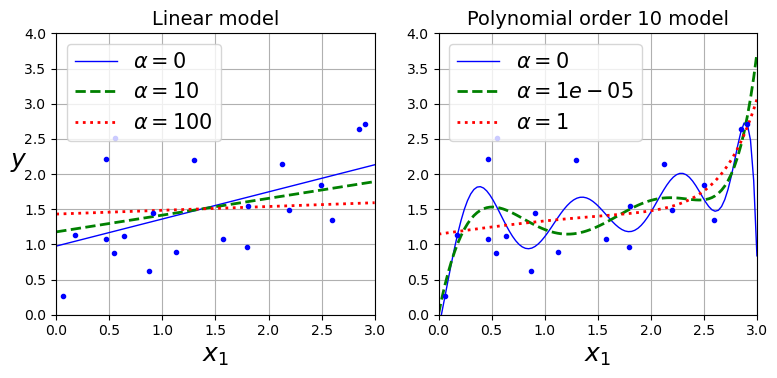

In [57]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
            title = 'Polynomial order 10 model'
        else:
            title = 'Linear model'
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])
    plt.grid()
    plt.title(title)

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

c:\Users\ctesc\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


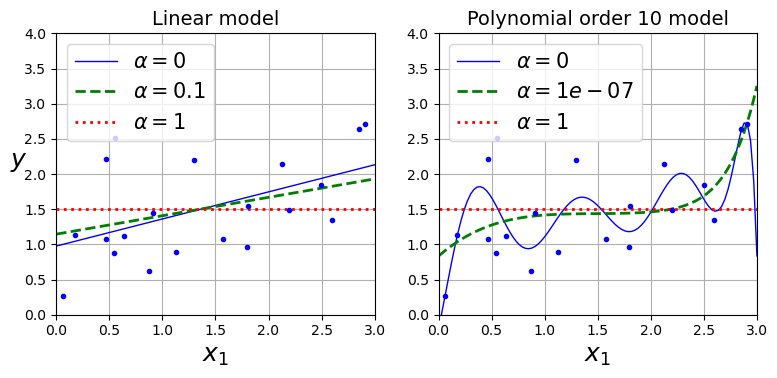

In [58]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

save_fig("lasso_regression_plot")
plt.show()

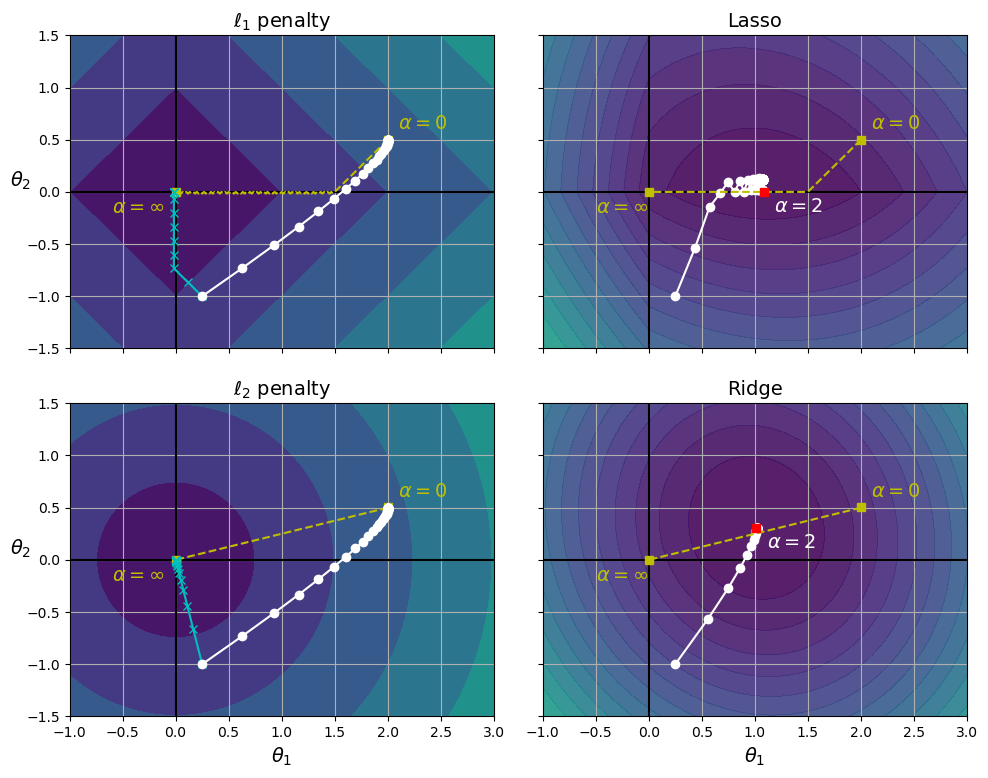

In [121]:
# extra code – this BIG cell generates and saves Figure 4–19

t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1 / len(Xr) * ((T @ Xr.T - yr.T) ** 2).sum(axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(J.argmin(), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

def bgd_path(theta, X, y, l1, l2, core=1, eta=0.05, n_iterations=200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = (core * 2 / len(X) * X.T @ (X @ theta - y)
                     + l1 * np.sign(theta) + l2 * theta)
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))

for i, N, l1, l2, title in ((0, N1, 2.0, 0, "Lasso"), (1, N2, 0, 2.0, "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2 ** 2

    tr_min_idx = np.unravel_index(JR.argmin(), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levels = np.exp(np.linspace(0, 1, 20)) - 1
    levelsJ = levels * (J.max() - J.min()) + J.min()
    levelsJR = levels * (JR.max() - JR.min()) + JR.min()
    levelsN = np.linspace(0, N.max(), 10)

    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(theta=np.array([[2.0], [0.5]]), X=Xr, y=yr,
                      l1=np.sign(l1) / 3, l2=np.sign(l2), core=0)
    path_inf = bgd_path(t_init, Xr, yr, l1=np.sign(l1) / 3, l2=np.sign(l2), core=0)
    path_0 = bgd_path(t_init, Xr, yr, l1=0, l2=0, core=1)
    ax = axes[i, 0]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, N / 2.0, levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.text(-.6, -.2, r'$\alpha = \infty$', color='y')
    ax.plot(t1_min, t2_min, "ys")
    ax.text(t1_min+.1, t2_min+.1, r'$\alpha = 0$', color='y')
    ax.plot(path_inf[::8, 0], path_inf[::8, 1], 'c-x')
    ax.plot(path_0[::2, 0], path_0[::2, 1], 'w-o')
    ax.set_title(fr"$\ell_{i + 1}$ penalty")
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")
    ax.set_ylabel(r"$\theta_2$", rotation=0)

    ax = axes[i, 1]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[::2, 0], path_JR[::2, 1], "w-o")
    ax.plot(path_N[::2, 0], path_N[::2, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.text(-.5, -.2, r'$\alpha = \infty$', color='y')
    ax.plot(t1_min, t2_min, "ys")
    ax.text(t1_min+.1, t2_min+.1, r'$\alpha = 0$', color='y')
    ax.plot(t1r_min, t2r_min, "rs")
    ax.text(t1r_min+.1, t2r_min-.2, r'$\alpha = 2$', color='w')
    ax.set_title(title)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")

save_fig("lasso_vs_ridge_plot")
plt.show()

In [122]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])